# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


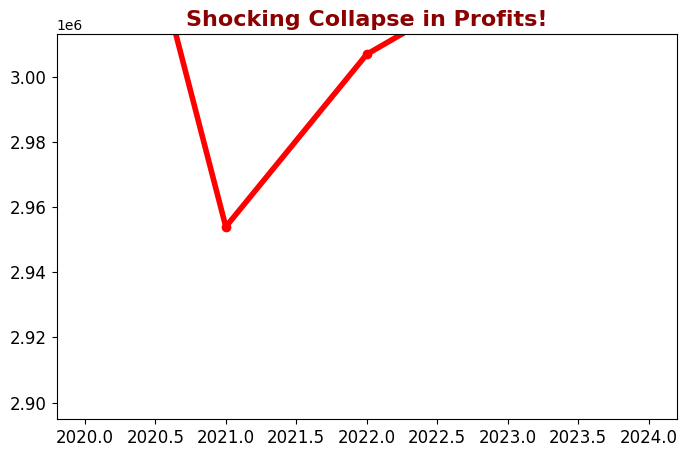

In [2]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02) 
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:
1. Emotionally charged language ('shocking collapse in profits').
2. Title says profits however the data is for sales (not the same thing). 
3. Non-neutral colors (red to imply bad/danager).
4. Y limit truncated to make minor differnces appear drastically different. Y should start at 0, truncating y adds a sort of zoom so that even the smallest differences can appear much larger.

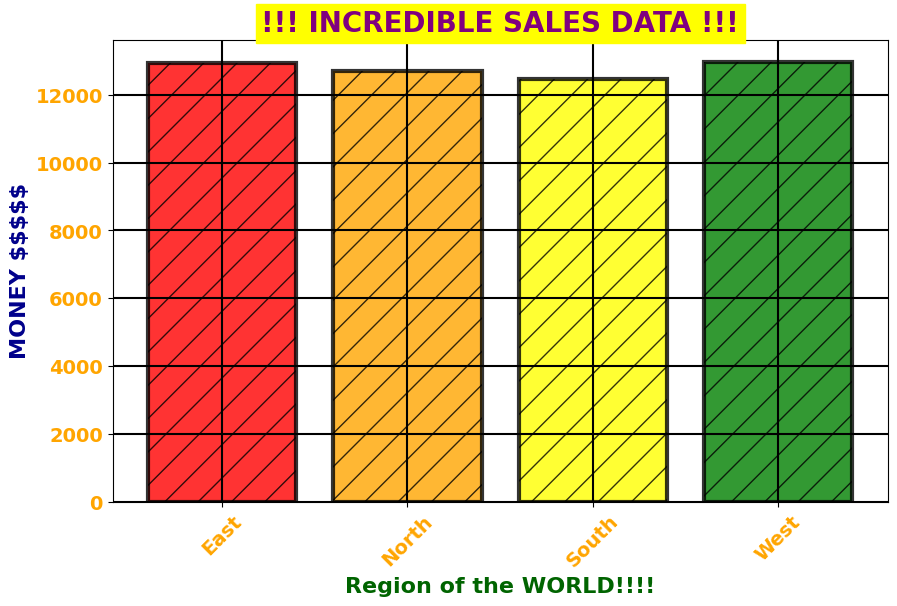

In [3]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
1. Emotionally charged language (again), using caps emphasis.
2. Uses impact statments like "Region of the WORLD" and MONEY $$$! to distract from the data: The sales are fairly boring, little to no differences across all regions.
3.  Careless use of color:  Different colors sometimes imply things silently.  Red is danager, green is safe, and everything in between is a 'warning'.  There is little to no differences with the data, colors may incorrectly make one region appear more successful simly because of color.
4. Diagonal "hatching" helps mask the bar heights/bar differenrces and makes the viewer have to really work at seeing the differences between otherwise same/very similar data.

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


In [4]:
# Your GOOD visualization(s) here

Chart 1 - Fixed

1. Adjusted Title:
  - Original title said profits but the data compared was for sales.
2. Changed font colors to a more neutral pallete.
3. Fixed y-lim truncation.  Y starts at 0. 
4. upper ylim 1.1 for breathing room

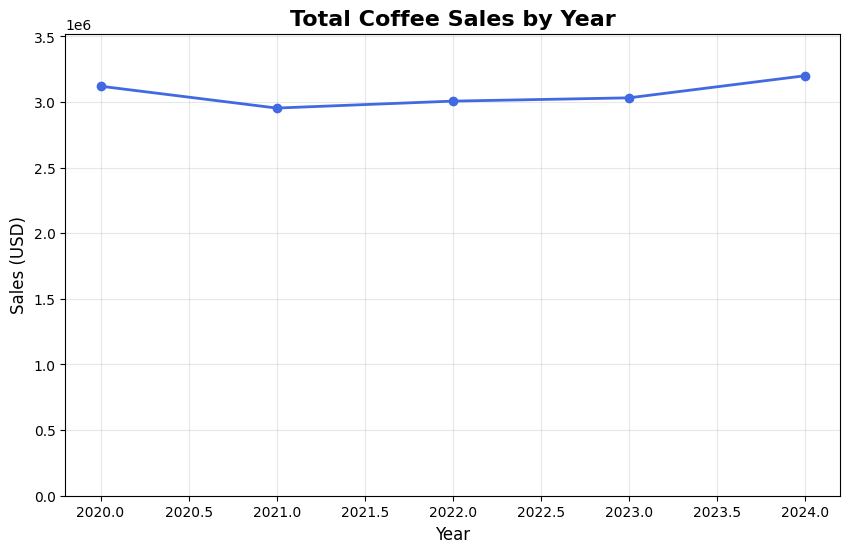

In [5]:
plt.figure(figsize=(10,6))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

plt.plot(subset["Year"], subset["Sales"], color="royalblue", linewidth=2, marker="o")
plt.ylim(0, subset["Sales"].max() * 1.1) 
plt.title("Total Coffee Sales by Year", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales (USD)", fontsize=12) 
plt.grid(True, alpha=0.3) 
plt.show()

Chat 2 - Fixed
1. Removed emotionally charged language/emphasis/impact statment.
2. Removed distractions from the data.
3. Adjusted colors used to be neutral.  Other chart was 'busy' for lack of a better description.
4. Removed hatching.
5. Boundries of the chart are much clearer and easier to understand.

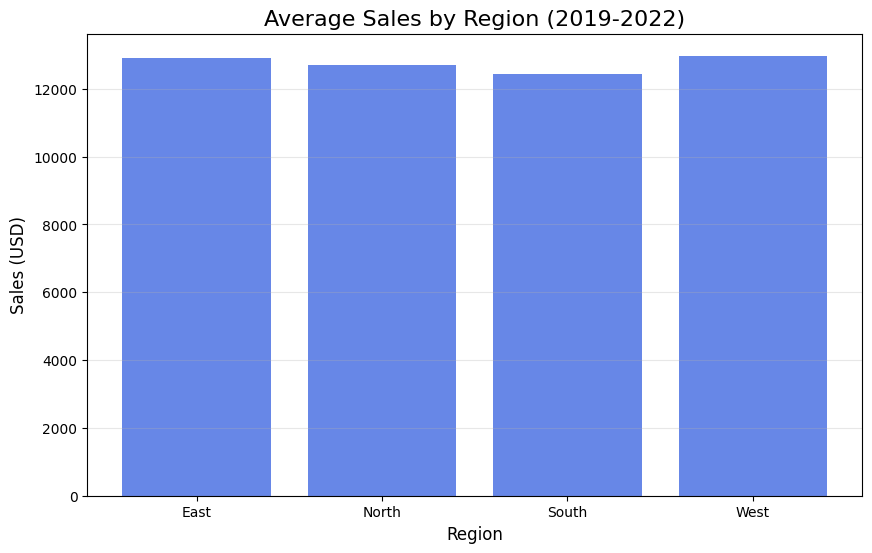

In [6]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

plt.bar(avg_sales["Region"], avg_sales["Sales"], color="royalblue", alpha=0.8)

plt.title("Average Sales by Region (2019-2022)", fontsize=16) 
plt.ylabel("Sales (USD)", fontsize=12)
plt.xlabel("Region", fontsize=12)

plt.grid(axis='y', alpha=0.3) 

plt.show()

Chart 3 - New Chart

Comparision of each type of coffee/product's sales. Use of a pivot table to slice category sales data for each year, for each category, and sum them.

Then we plot the values, and show the graphic.

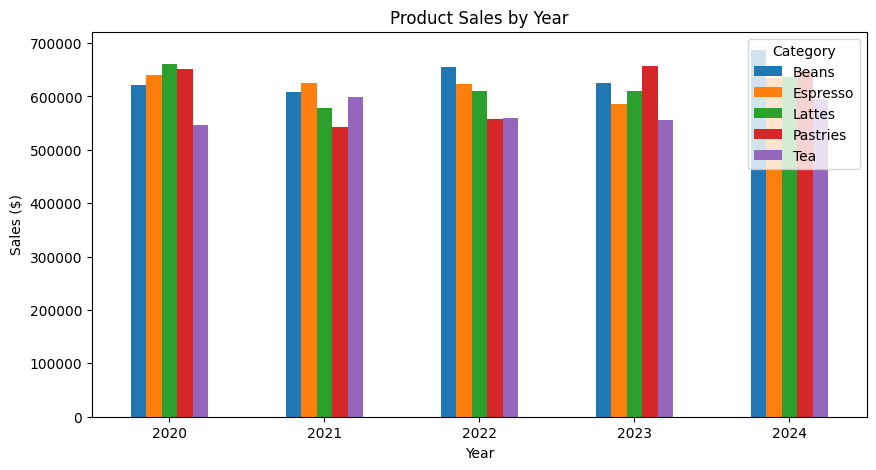

In [7]:
sales_summary = coffee_df.pivot_table(
    index='Year',
    columns='Category',
    values='Sales',
    aggfunc='sum'
)

sales_summary.plot(kind='bar', figsize=(10, 5), rot=0)

plt.title("Product Sales by Year")
plt.ylabel("Sales ($)")
plt.xlabel("Year")
plt.show()

Chart 4 - New Chart

Comparison of each type of coffee/product sales per month for each year. Usage of pivot tabel to slice monthly sales values, aggfunc sum to add each years sales for each month up, and we order it based on the month_order varible we previously defined.

Chart easily shows each months best selling product.

( Bean's sell best in August, Pastries sell best in october )

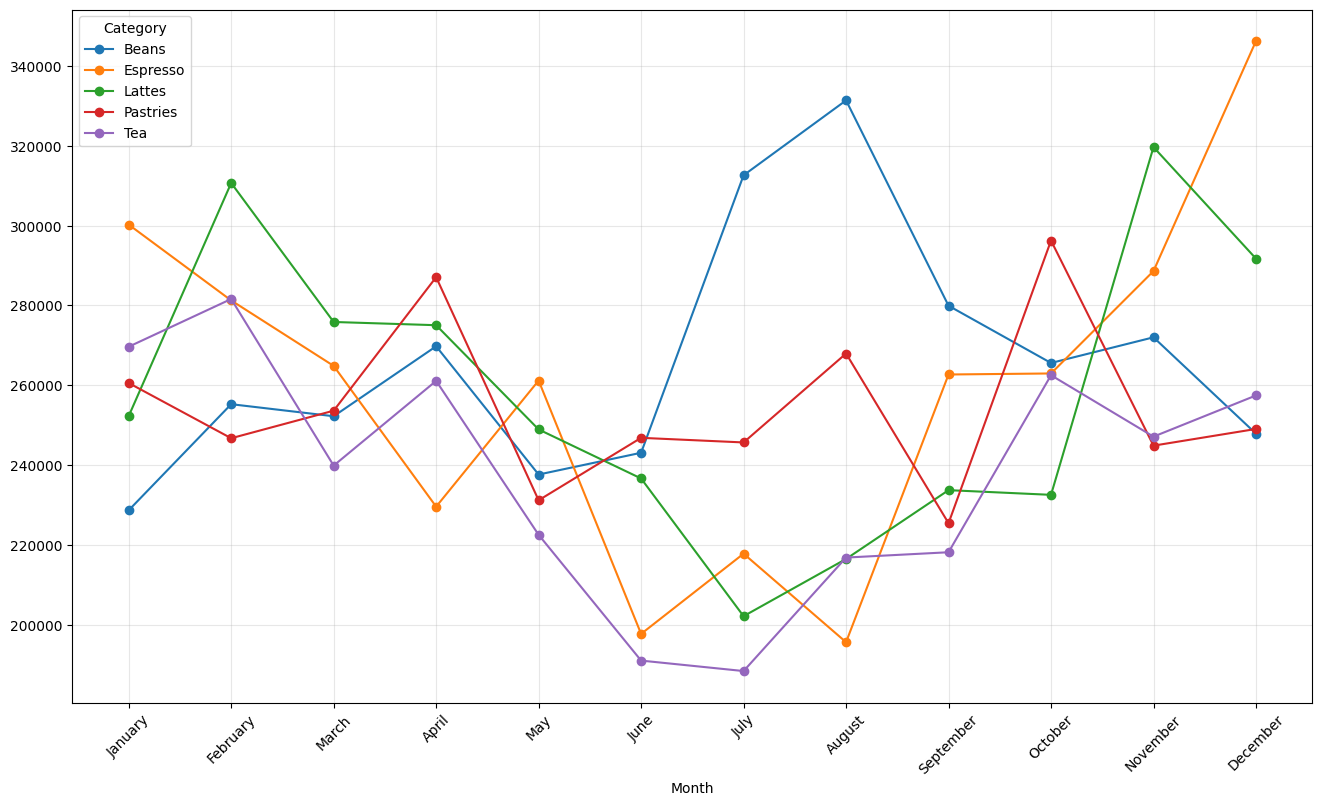

In [8]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

coffee_df['Month'] = pd.Categorical(coffee_df['Month'], categories=month_order, ordered=True)

sales_summary = coffee_df.pivot_table(
    index='Month', 
    columns='Category', 
    values='Sales', 
    aggfunc='sum',
    observed=False
)

sales_summary.plot(kind='line', marker='o', figsize=(16, 9))

plt.xticks(range(len(sales_summary.index)), sales_summary.index, rotation=45)
plt.grid(True, alpha=0.3)
plt.show()